In [10]:
import pandas as pd

df = pd.read_csv('IRE_Autism.csv')

In [11]:
df

,question,year,answer,upvotes,views,shares,comments,comment_date,comment_answer,comment_upvotes
0,What are subtle signs of autism and Asperger s...,1,"Well, Asperger’s Syndrome is just autism, so w...",1139,342400,41,159,1,"Daang, this is soooo relatable and funny to re...",45
1,What is Asperger’s syndrome?,7,Asperger’s is a neurological development disor...,129,31300,5,33,6,Thank you for sharing. My 46 yr old boyfriend ...,3
2,What are the advantages of having Asperger's s...,2,My son has Asperger’s. While he struggles soci...,264,17800,3,14,7,He’s lucky to have you. You’re lucky to have him.,17
3,"What, if anything, is wrong with having Asperg...",7,Post 10 — What are the main problems that peop...,123,13600,10,11,7,This is a very well written answer! I can see ...,8
4,Is Asperger Syndrome overdiagnosed?,6,Contrary to every other anecdote based answer ...,20,4500,0,14,5,Wow. A lot of opinion there. Even your links t...,5
...,...,...,...,...,...,...,...,...,...,...
3159,"What is Autism in babies like, is it even dete...",5,There’s not a lot to go on in really young inf...,4,433,0,1,5,"Thank you, did not know that!",0
3160,What is Autism Spectrum disorder and how we ca...,1,Autism Spectrum Disorder (ASD) is a developmen...,0,32,0,0,0,NaN,0
3161,What is autism and dyslexia? What is their sol...,3,Autism is a neurodevelopmental disorder. Peopl...,0,205,0,0,0,NaN,0
3162,What is autism spectrum disorder? And how can ...,5,With the great creator of Alice in Wonderland ...,3,256,0,0,0,NaN,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3164 entries, 0 to 3163
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   question         3164 non-null   object
 1   year             3164 non-null   int64 
 2   answer           3164 non-null   object
 3   upvotes          3164 non-null   int64 
 4   views            3164 non-null   int64 
 5   shares           3164 non-null   int64 
 6   comments         3164 non-null   int64 
 7   comment_date     3164 non-null   int64 
 8   comment_answer   1227 non-null   object
 9   comment_upvotes  3164 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 247.3+ KB


In [13]:
! pip install textblob

(3164, 10)
question             object
years_ago             int64
answer               object
upvotes               int64
views                 int64
shares                int64
comments              int64
comment_years_ago     int64
comment_answer       object
comment_upvotes       int64
dtype: object
           upvotes         views       shares    comments  comment_upvotes
count  3164.000000  3.164000e+03  3164.000000  3164.00000      3164.000000
mean     45.633375  9.595093e+03     0.954488     5.14507         2.876106
std     275.217694  8.546961e+04     3.928601    26.96678        18.263185
min       0.000000  0.000000e+00     0.000000     0.00000         0.000000
25%       0.000000  1.760000e+02     0.000000     0.00000         0.000000
50%       3.000000  5.715000e+02     0.000000     0.00000         0.000000
75%      12.000000  2.200000e+03     0.000000     2.00000         0.000000
max    9369.000000  3.200000e+06    67.000000   944.00000       614.000000


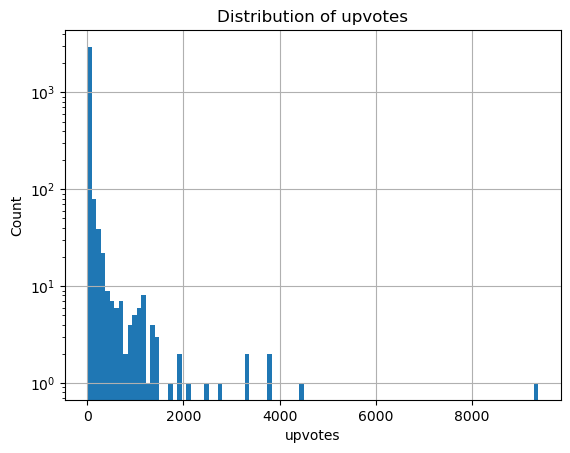

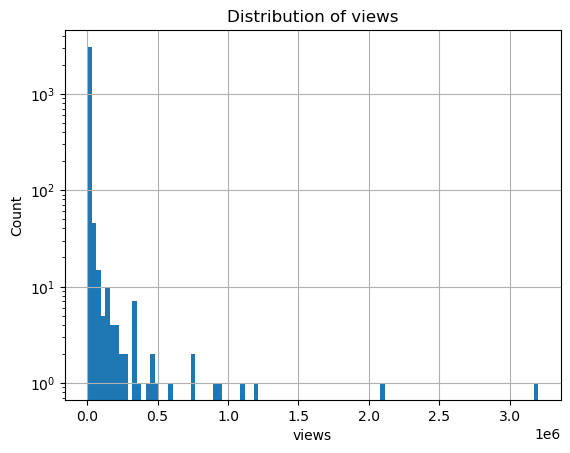

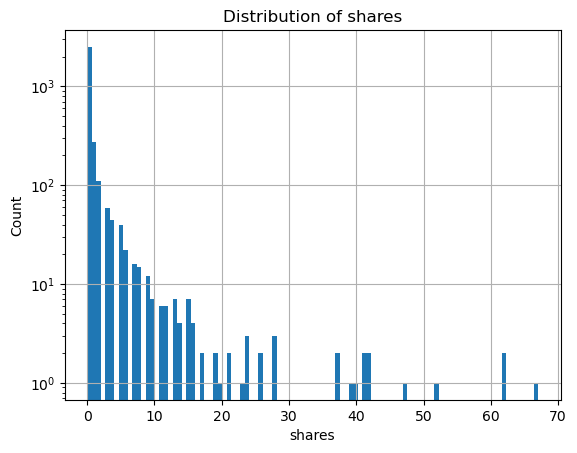

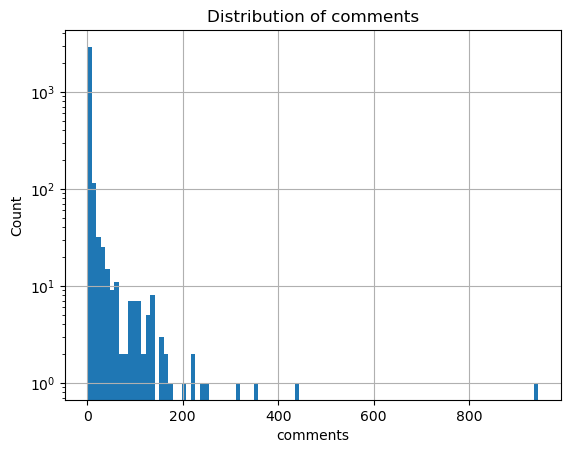

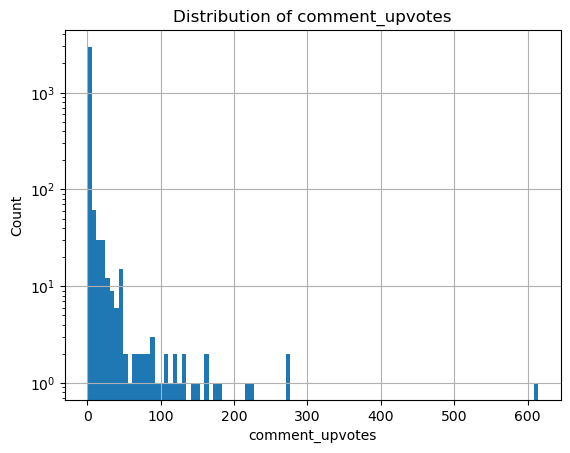

Overall variances:
upvotes            7.574478e+04
views              7.305054e+09
shares             1.543391e+01
comments           7.272072e+02
comment_upvotes    3.335439e+02
dtype: float64
Topic 0: autism, signs, diagnosis, social, anxiety, old, speech, early, toddler, diagnosed
Topic 1: autism, people, like, adhd, high, asperger, school, functioning, syndrome, living
Topic 2: autistic, child, parents, therapy, aba, autism, does, meltdown, parent, children
Topic 3: autism, empathy, sign, sensory, issues, relationship, toddlers, individuals, lack, experience
Topic 4: autism, spectrum, disorder, functioning, high, asperger, non, syndrome, verbal, asd
[ 1  7  2  6 10  3  4  5  8  9 11 13 14  0 12]
trend_counts
topic        0   1   2   3   4
years_ago                     
0          123  72  85  88  55
1          127  73  66  90  61
2          146  96  95  64  75
3          100  80  34  58  53
4          114  66  55  72  56
5           75  62  64  62  77
6           97  69  62  56  87

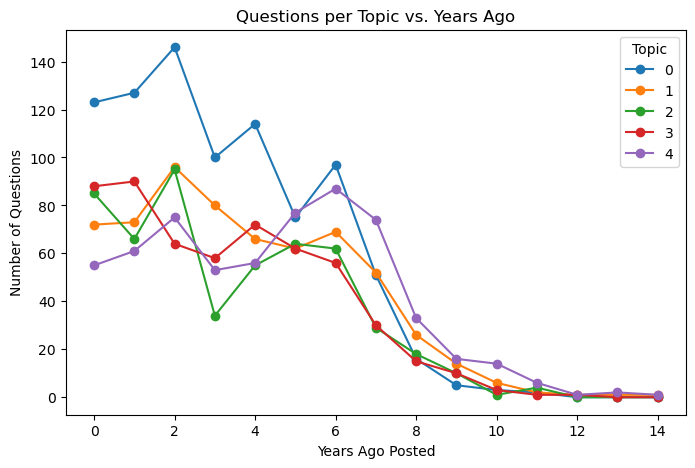

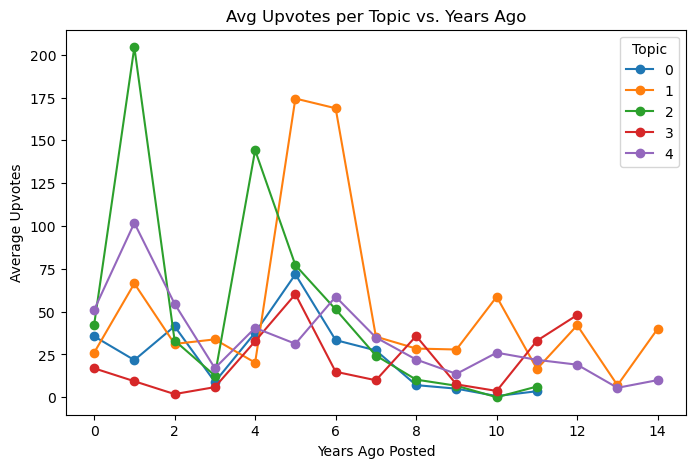

Comment stance ratios:
stance
neutral       0.774336
supportive    0.193110
against       0.032554
Name: proportion, dtype: float64


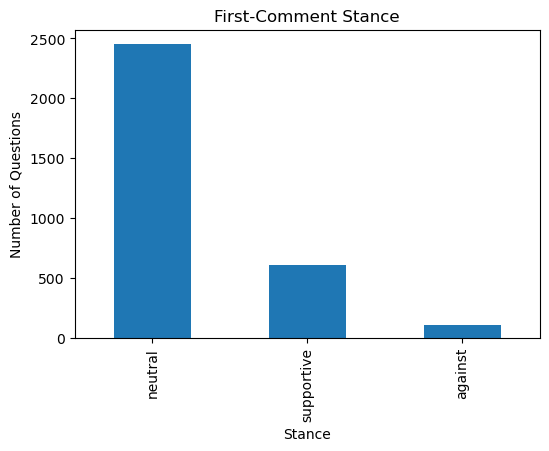

ANOVA for upvotes by topic:  F=3.57, p=0.006


In [ ]:
# 0.   ENVIRONMENT SETUP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob

# 1.   LOAD & PREPARE
df = pd.read_csv('IRE_Autism.csv')

# Clarify column semantics
df = df.rename(columns={
    'year': 'years_ago',            # how long ago the question was posted
    'comment_date': 'comment_years_ago'
})

# Quick check
print(df.shape)
print(df.dtypes)
df.head()


# 2.   “How much data is collected per post?”
# Since each row is a distinct question, we can directly inspect distributions:
metrics = ['upvotes','views','shares','comments','comment_upvotes']
print(df[metrics].describe())

# Optional histograms
for col in metrics:
    plt.figure()
    
    df[col].hist(bins=100)
    plt.yscale('log')  
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


# 3.   “Variance of audience reactions—and relationship wrt subtopic”
# 3.1 Compute overall variances
print("Overall variances:")
print(df[metrics].var())

# 3.2 After we discover topics below, we can test variance across topics.
#    For now, placeholder: once df['topic'] exists, do e.g.:
# f_oneway(*(df[df.topic==t]['upvotes'] for t in sorted(df.topic.unique())))


# 4.   “Discover sub‑topics via LDA”
# 4.1  Vectorize the question text
vectorizer = CountVectorizer(
    stop_words='english',
    max_df=0.9,
    min_df=20
)
Q = vectorizer.fit_transform(df['question'])

# 4.2  Fit an LDA model
n_topics = 5
lda = LatentDirichletAllocation(
    n_components=n_topics,
    random_state=0,
    learning_method='batch'
)
lda.fit(Q)

# 4.3  Show top words per topic
terms = vectorizer.get_feature_names_out()
for i, comp in enumerate(lda.components_):
    top_idx = np.argsort(comp)[-10:][::-1]
    top_terms = [terms[j] for j in top_idx]
    print(f"Topic {i}: {', '.join(top_terms)}")

# 4.4  Assign each question its dominant topic
topic_dists = lda.transform(Q)
df['topic'] = topic_dists.argmax(axis=1)


# 5.   “Temporal trends of topics & reactions”
# 5.1  How many questions per topic, by posting‐age

trend_counts = (
    df
    .groupby(['years_ago','topic'])
    .size()
    .unstack(fill_value=0)
)

trend_counts.plot(marker='o', figsize=(8,5))
plt.title('Questions per Topic vs. Years Ago')
plt.xlabel('Years Ago Posted')
plt.ylabel('Number of Questions')
plt.legend(title='Topic')
plt.show()

# 5.2  Average upvotes per topic over posting‐age
trend_upv = (
    df
    .groupby(['years_ago','topic'])['upvotes']
    .mean()
    .unstack()
)
trend_upv.plot(marker='o', figsize=(8,5))
plt.title('Avg Upvotes per Topic vs. Years Ago')
plt.xlabel('Years Ago Posted')
plt.ylabel('Average Upvotes')
plt.legend(title='Topic')
plt.show()


# 6.   “Sentiment & polarity of the first comment”
# 6.1  Compute polarity & subjectivity
mask = df['comment_answer'].notna()
pol = df.loc[mask, 'comment_answer'].apply(lambda txt: TextBlob(txt).sentiment)
df.loc[mask, 'polarity']    = pol.apply(lambda s: s.polarity)
df.loc[mask, 'subjectivity']= pol.apply(lambda s: s.subjectivity)

# 6.2  Label supportive / against / neutral
def label_stance(p):
    if   p >  0.1: return 'supportive'
    elif p < -0.1: return 'against'
    else:          return 'neutral'

df['stance'] = df['polarity'].fillna(0).apply(label_stance)

# 6.3  Overall ratio
print("Comment stance ratios:")
print(df['stance'].value_counts(normalize=True))

# 6.4  Plot
plt.figure(figsize=(6,4))
df['stance'].value_counts().plot(kind='bar')
plt.title('First-Comment Stance')
plt.xlabel('Stance')
plt.ylabel('Number of Questions')
plt.show()


# 7.   “Variance of reactions wrt subtopic” (ties back to §3.2)
groups = [df.loc[df.topic==t,'upvotes'] for t in df.topic.unique()]
anova = f_oneway(*groups)
print(f"ANOVA for upvotes by topic:  F={anova.statistic:.2f}, p={anova.pvalue:.3f}")
